In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set(rc={'figure.figsize':(10, 10)})

# Data analysis

In [2]:
diamonds = pd.read_csv("diamonds.csv", index_col=0)

How data looks like:

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Our target variable is price.
First, we will check our data for nulls:

In [4]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


No nulls.

x, y, z there are min values = 0

In [6]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [7]:
# drop those rows
diamonds.drop(diamonds[(diamonds.x == 0) | (diamonds.y == 0) | (diamonds.z == 0)].index, inplace=True)


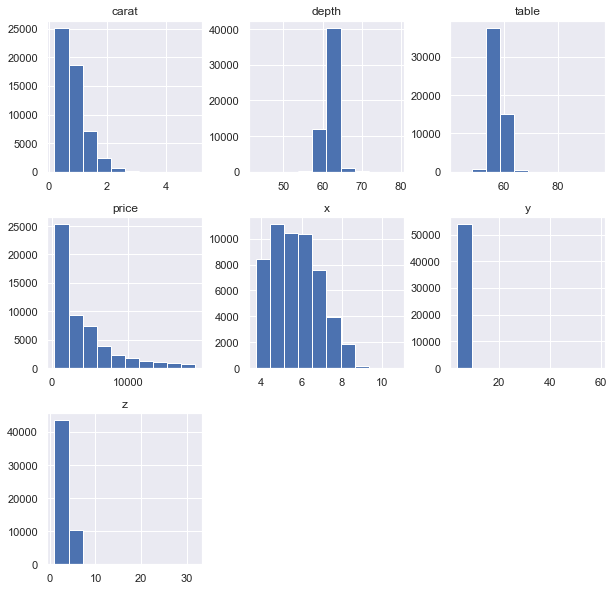

In [8]:
## Visual analysis

# Distribution

diamonds.hist(figsize=(10, 10))
plt.show()

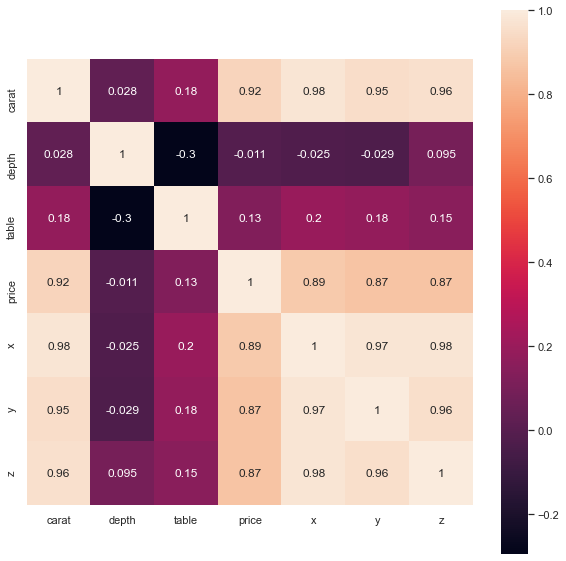

In [9]:
# Correlation
# Should add some conclusions coming from charts
corr = diamonds.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
plt.show()

In [10]:
# Relationship between price and carat

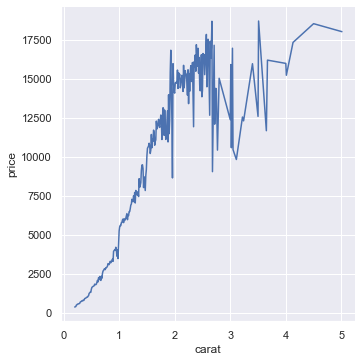

In [11]:
sns.relplot(x="carat", y="price", kind="line", ci=None, data=diamonds)

In [12]:
# What to do with categorical variables?

In [13]:
# Cut

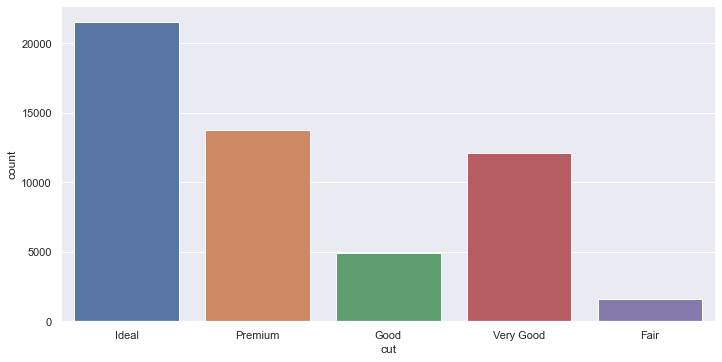

In [14]:
p = sns.catplot(x='cut', data=diamonds , kind='count',aspect=2 )

In [15]:
# Color

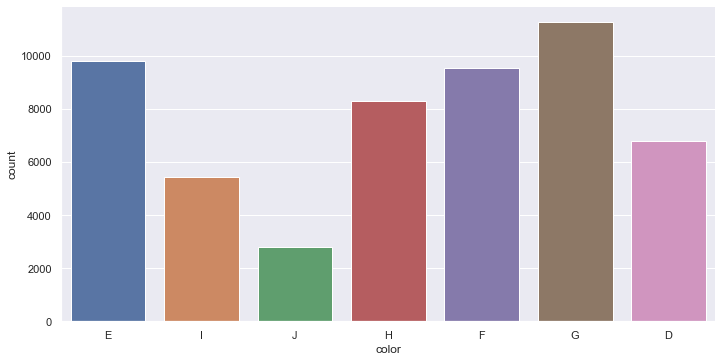

In [16]:
p = sns.catplot(x='color', data=diamonds , kind='count',aspect=2 )

In [17]:
# CLarity

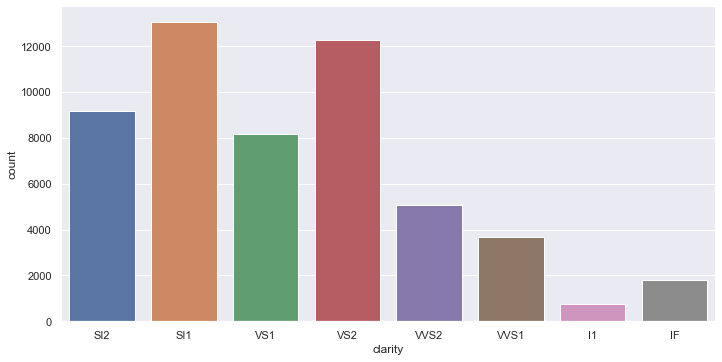

In [18]:
p = sns.catplot(x='clarity', data=diamonds , kind='count',aspect=2 )

In [19]:
# one-hot enocoding
one_hot_encoded_data =  pd.get_dummies(diamonds)
one_hot_encoded_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [20]:
# axis = 1 because it's two-dimensional
x = one_hot_encoded_data.drop(["price"],axis=1)
y = one_hot_encoded_data.price

In [21]:
# creating training set

train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

In [22]:
# MODEL

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [24]:
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")

accuracy: 92.20385878352354%


(37744,)
(37744, 26)
(16176, 26)
(16176,)
(16176,)


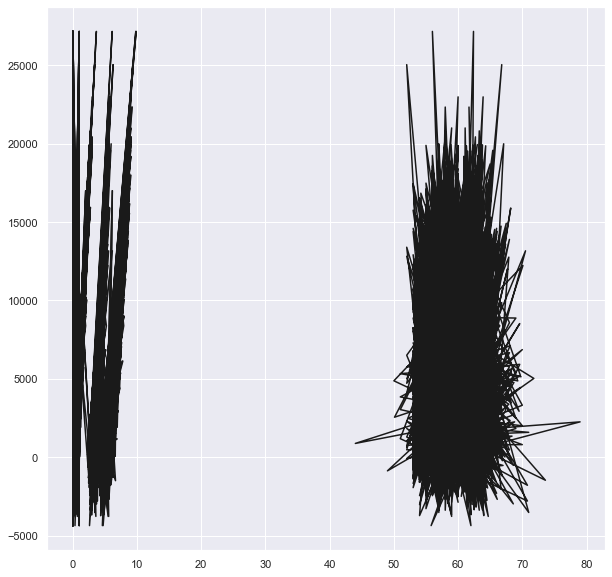

In [27]:
#print(train_x)
#print("X")
#print(y_pred)

#plt.scatter(train_x[:,0], train_y,  color='black')
#print(train_x.shape)
#print(train_y.shape)
#np.reshape(train_y, (37744, 26))

#train_y = train_y[:, np.newaxis]

print(train_y.shape)
print(train_x.shape)

print(test_x.shape)
print(test_y.shape)
print(y_pred.shape)

#plt.scatter(test_x, test_y, color='green')
plt.plot(test_x, y_pred, color='k')
plt.show()